In [ ]:
#C2054492

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("Coursework_1_data.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['VisitorType'] = labelencoder.fit_transform(df['VisitorType'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekend'] = labelencoder.fit_transform(df["Weekend"])


In [ ]:
X_num = df.iloc[:,0:10]
X_cat = df.iloc[:,10:17]
y = df.Revenue

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
# Convert categoric data

In [ ]:
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
X_categorical = df[categorical_features]



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_categorical = X_categorical.astype("object")
X_cat = pd.get_dummies(X_categorical)

In [ ]:
# handle highly correlated columns

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

df_bouncerate_exitrate = df[["ExitRates", "BounceRates"]]
pca_exit_bounce_rate = pca.fit_transform(df_bouncerate_exitrate)

df_productRelated = df[["ProductRelated", "ProductRelated_Duration"]]
pca_product_related = pca.fit_transform(df_productRelated)

df_Informational = df[["Informational", "Informational_Duration"]]
pca_Informational = pca.fit_transform(df_Informational)

df_Administrative = df[["Administrative", "Administrative_Duration"]]
pca_Administrative = pca.fit_transform(df_Administrative)



In [ ]:
df = df.drop(["ExitRates", "BounceRates", "ProductRelated", "ProductRelated_Duration"],1)
df["PCA_Exit_Bounce_Rate"] = pca_exit_bounce_rate
df["PCA_Product_Related"] = pca_product_related
df["Pca_Informational"] = pca_Informational
df["Pca_Administrative"] = pca_Administrative

In [ ]:
# Convert numeric data

In [ ]:
numerical_features = ["Pca_Informational", "Pca_Administrative", "PCA_Product_Related", 
                      "PageValues", "SpecialDay", "PCA_Exit_Bounce_Rate"]
X_numerical = df[numerical_features]

In [ ]:
minmaxscaler = MinMaxScaler()
X_num = minmaxscaler.fit_transform(X_numerical)
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_num = powertransformer.fit_transform(X_num)
X_num = pd.DataFrame(X_num, columns= numerical_features)

In [ ]:
X = pd.concat([X_cat, X_num],1);X

,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1,Pca_Informational,Pca_Administrative,PCA_Product_Related,PageValues,SpecialDay,PCA_Exit_Bounce_Rate
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.451278,-0.828156,-1.258159,-0.501956,-0.33602,2.036137
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.451278,-0.828156,-1.124643,-0.501956,-0.33602,1.216453
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.451278,-0.828156,-1.258159,-0.501956,-0.33602,2.036137
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.451278,-0.828156,-1.252445,-0.501956,-0.33602,1.785005
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.451278,-0.828156,-0.158714,-0.501956,-0.33602,0.785678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.451278,1.282813,1.007043,1.897477,-0.33602,-0.028589
12326,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.451278,-0.828156,-0.401326,-0.501956,-0.33602,-0.564069
12327,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,-0.451278,-0.828156,-0.888120,-0.501956,-0.33602,1.710898
12328,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.451278,0.601755,-0.597388,-0.501956,-0.33602,-0.575630


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
 best_features= ['PageValues', 'PCA_Exit_Bounce_Rate', 'PCA_Product_Related',
       'Pca_Administrative', 'Month_7', 'Pca_Informational',
       'VisitorType_0', 'Month_6', 'Month_5', 'VisitorType_2',
       'TrafficType_2', 'Region_1', 'Weekend_0', 'Browser_2', 'Month_1']

In [ ]:
X = X[best_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.values
X_test = X_test.values
y_train  = y_train.values
y_test  = y_test.values

In [ ]:
#smote = SMOTE(sampling_strategy=0.5)
#X_train, y_train = smote.fit_resample(X_train, y_train)
rus = RandomUnderSampler(sampling_strategy= 0.8)
X_train, y_train = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
parametreler = {'calibratedclassifiercv__base_estimator__n_estimators': [20, 30],
                        "calibratedclassifiercv__base_estimator__learning_rate" : [0.01, 0.05, 0.1],
                        "calibratedclassifiercv__base_estimator__max_depth" : [3, 5, 8, 10]
                        #"calibratedclassifiercv__base_estimator__max_scale_pos_weight" : [1, 1.125, 1.5, 2] 
                }


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import classification_report

imbalance_pipeline = make_pipeline(CalibratedClassifierCV(LGBMClassifier()))

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 

grid_imbalance = GridSearchCV(imbalance_pipeline, parametreler, cv=cv, scoring='recall',
                        return_train_score=True)

grid_imbalance.fit(X_train, y_train)

y_pred = grid_imbalance.predict(X_test)

In [ ]:
print("*****LigthGBM-RandomUndersampler-PCA-BestFeatures****")
print("Validation Recall: {}".format(grid_imbalance.best_score_))

print("Recall Test: {}".format(recall_score(y_test, y_pred)))

print("Precision Test: {}".format(precision_score(y_test, y_pred)))

print("F2 Test: {}".format(fbeta_score(y_test, y_pred,2)))

print("F1 Test: {}".format(fbeta_score(y_test, y_pred,1)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

*****LigthGBM-RandomUndersampler-PCA-BestFeatures****
Validation Recall: 0.823520141830001
Recall Test: 0.8580246913580247
Precision Test: 0.5704514363885089
F2 Test: 0.7794392523364486
F1 Test: 0.685291700903862
[[2283  314]
 [  69  417]]
              precision    recall  f1-score   support

       False       0.97      0.88      0.92      2597
        True       0.57      0.86      0.69       486

    accuracy                           0.88      3083
   macro avg       0.77      0.87      0.80      3083
weighted avg       0.91      0.88      0.89      3083



In [ ]:
grid_imbalance.best_params_

{'calibratedclassifiercv__base_estimator__learning_rate': 0.05,
 'calibratedclassifiercv__base_estimator__max_depth': 5,
 'calibratedclassifiercv__base_estimator__n_estimators': 30}

No Skill ROC AUC 0.492
LGBM ROC AUC 0.940


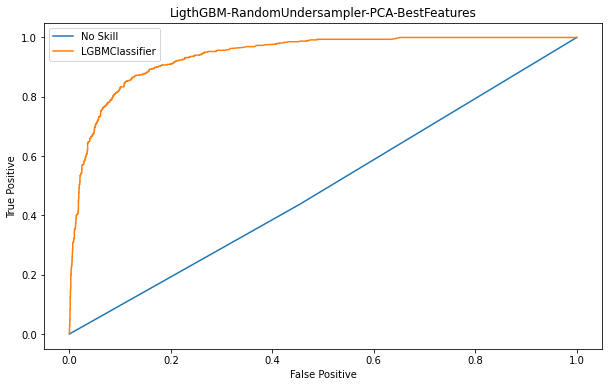

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(test_y, dummy_probs, model_probs):
    plt.figure(figsize=(10,6))
    
    falsep, truep, _ = roc_curve(test_y, dummy_probs)
    plt.plot(falsep, truep, label='No Skill')
    
    falsep, truep, _ = roc_curve(test_y, model_probs)
    plt.plot(falsep, truep, label='LGBMClassifier')
    
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title("LigthGBM-RandomUndersampler-PCA-BestFeatures")
    plt.legend()
    plt.show()

model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
dummy_probs = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, dummy_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

y_pred_prob = grid_imbalance.predict_proba(X_test)
modelprod = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, modelprod)
print('LGBM ROC AUC %.3f' % roc_auc)

plot_roc_curve(y_test, dummy_probs, modelprod)

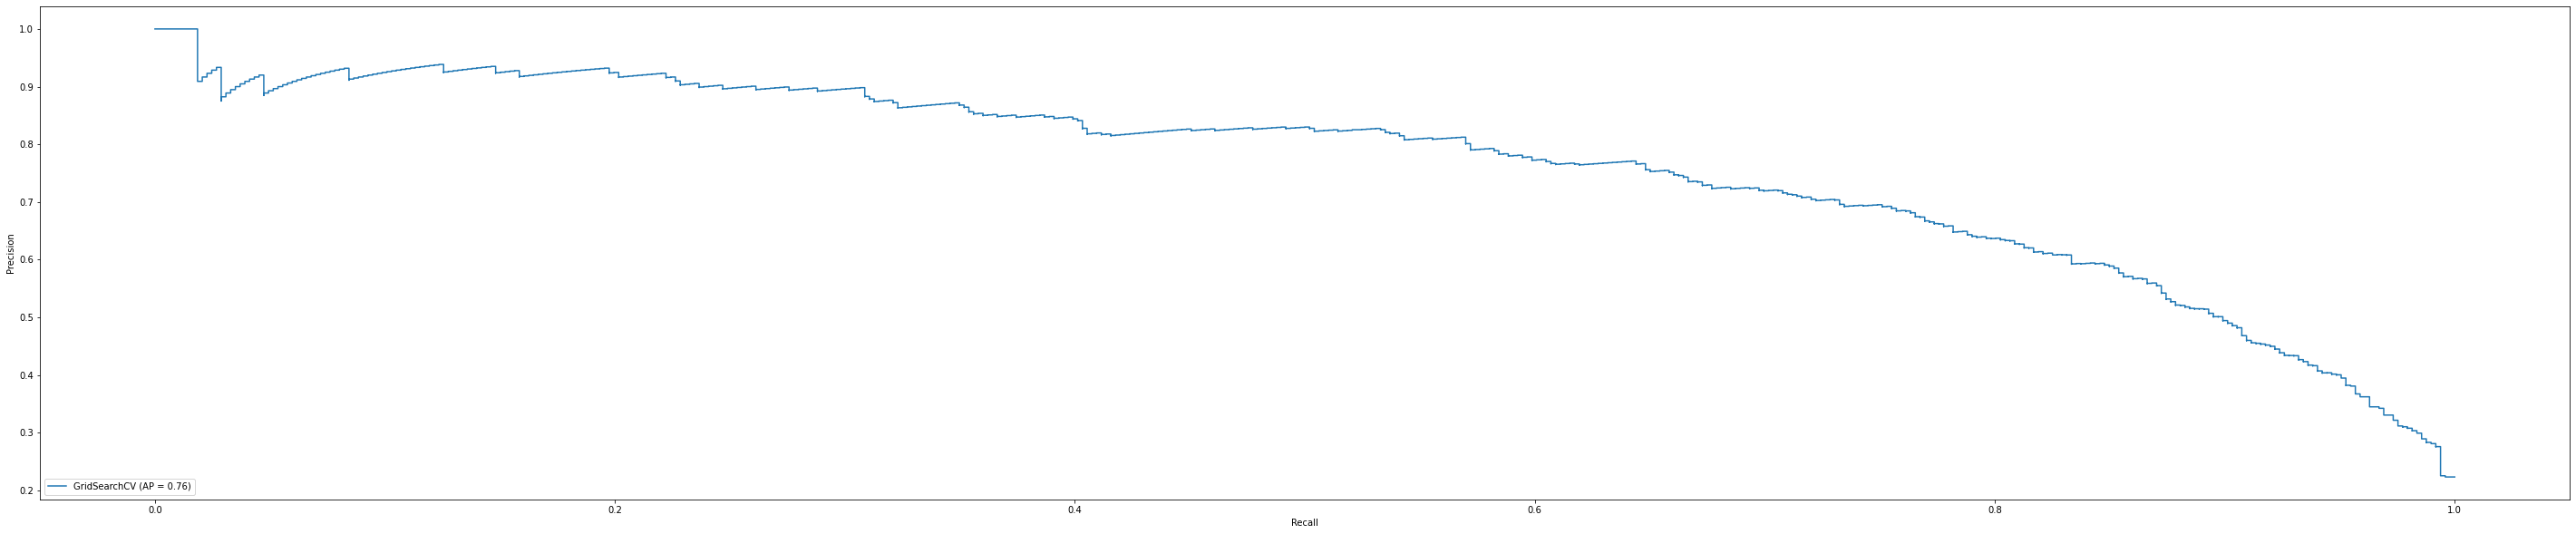

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(grid_imbalance ,X_test, y_test)